In [1]:
import numpy as np
import matplotlib.pyplot as plt

from game import *
from agents import *
from util import *
from checkers import *

In [3]:
n_features = 33
feature_func = checkers_features_augmented

# n_features = 11
# feature_func = checkers_features_simple

max_moves = 1000

initial_weights = np.random.normal(size=n_features)
# initial_weights = np.zeros((n_features,))
first_agent = QLearningAgent(feature_func, n_features, alpha=0., gamma=0.7, epsilon=0., is_learning_agent=False, weights=initial_weights)
ab1 = AlphaBetaAgent(1)
ab2 = AlphaBetaAgent(2)
ab3 = AlphaBetaAgent(3)
rand_agent = RandomAgent()

quiet = True
test_results = []
test_draws = []

n_games_test = 100
max_random_start_depth = 3

for n in range(n_games_test):
    if n%10 ==0:print(n)
    first_agent_turn = bool(np.random.binomial(1,0.5))
    rules = ClassicGameRules(max_moves=max_moves)
    game = rules.new_game(first_agent, rand_agent, first_agent_turn, quiet=quiet)
    # random start
    for _ in range(np.random.choice(max_random_start_depth)*2):
        possible_moves = game.game_state.board.get_possible_next_moves()
        next_move = possible_moves[np.random.choice(len(possible_moves),size=1)[0]]
        game.game_state.board.make_move(next_move, switch_player_turn=True)

    num_moves, game_state = game.run()
    test_results.append(game_state.is_first_agent_win())
    test_draws.append(game_state.max_moves_done)
np.mean(np.array(test_results)),np.mean(np.array(test_draws))

0
10
20
30
40
50
60
70
80
90


(0.01, 0.0)

In [4]:
first_agent = QLearningAgent(feature_func, n_features, alpha=0., gamma=0.7, epsilon=0., is_learning_agent=False, weights=initial_weights)

test_results = []
test_draws = []

n_games_test = 100
max_random_start_depth = 3

for n in range(n_games_test):
    if n%10 ==0:print(n)
    first_agent_turn = bool(np.random.binomial(1,0.5))
    rules = ClassicGameRules(max_moves=max_moves)
    game = rules.new_game(first_agent, ab1, first_agent_turn, quiet=quiet)
    # random start
    for _ in range(np.random.choice(max_random_start_depth)*2):
        possible_moves = game.game_state.board.get_possible_next_moves()
        next_move = possible_moves[np.random.choice(len(possible_moves),size=1)[0]]
        game.game_state.board.make_move(next_move, switch_player_turn=True)

    num_moves, game_state = game.run()
    test_results.append(game_state.is_first_agent_win())
    test_draws.append(game_state.max_moves_done)
np.mean(np.array(test_results)),np.mean(np.array(test_draws))

0
10
20
30
40
50
60
70
80
90


(0.0, 0.0)

In [58]:
first_agent = QLearningAgent(feature_func, n_features, alpha=0., gamma=0.7, epsilon=0., is_learning_agent=False, weights=initial_weights)

test_results = []
test_draws = []

n_games_test = 100
max_random_start_depth = 3

for n in range(n_games_test):
    if n%10 ==0:print(n)
    first_agent_turn = bool(np.random.binomial(1,0.5))
    rules = ClassicGameRules(max_moves=max_moves)
    game = rules.new_game(first_agent, ab2, first_agent_turn, quiet=quiet)    
    # random start
    for _ in range(np.random.choice(max_random_start_depth)*2):
        possible_moves = game.game_state.board.get_possible_next_moves()
        next_move = possible_moves[np.random.choice(len(possible_moves),size=1)[0]]
        game.game_state.board.make_move(next_move, switch_player_turn=True)

    num_moves, game_state = game.run()
    test_results.append(game_state.is_first_agent_win())
    test_draws.append(game_state.max_moves_done)
np.mean(np.array(test_results)),np.mean(np.array(test_draws))

0
10
20
30
40
50
60
70
80
90


(0.0, 0.0)

In [59]:
first_agent = QLearningAgent(feature_func, n_features, alpha=0., gamma=0.7, epsilon=0., is_learning_agent=False, weights=initial_weights)

test_results = []
test_draws = []

n_games_test = 100
max_random_start_depth = 3

for n in range(n_games_test):
    if n%10 ==0:print(n)
    first_agent_turn = bool(np.random.binomial(1,0.5))
    rules = ClassicGameRules(max_moves=max_moves)
    game = rules.new_game(first_agent, ab3, first_agent_turn, quiet=quiet)    
    # random start
    for _ in range(np.random.choice(max_random_start_depth)*2):
        possible_moves = game.game_state.board.get_possible_next_moves()
        next_move = possible_moves[np.random.choice(len(possible_moves),size=1)[0]]
        game.game_state.board.make_move(next_move, switch_player_turn=True)

    num_moves, game_state = game.run()
    test_results.append(game_state.is_first_agent_win())
    test_draws.append(game_state.max_moves_done)
np.mean(np.array(test_results)),np.mean(np.array(test_draws))

0
10
20
30
40
50
60
70
80
90


(0.0, 0.0)

In [60]:
n_train_games = 500
n_decay = 100
n_games_test = 10
test_frequency = 10
max_random_start_depth_train = 2
max_random_start_depth_test = 2

first_agent = QLearningAgent(feature_func, n_features, alpha=0.0015, gamma=0.7, epsilon=0.35, is_learning_agent=True, weights=initial_weights)
second_agent_list = [ab1, ab2, ab3, rand_agent]
all_results = []
all_draws = []
all_oppn_idx = []
all_weights = []
all_num = []
test_results_rand = []
test_results_1 = []
test_results_2 = []
test_results_3 = []
test_draws_rand = []
test_draws_1 = []
test_draws_2 = []
test_draws_3 = []

for n in range(n_train_games):
    
    # change alpha and epsilon after n_decay games
    if n%n_decay == n_decay-1:
        first_agent.alpha = max([0.9*first_agent.alpha, 1e-4])
        first_agent.epsilon = max([0.9*first_agent.epsilon, 0.1])
        print(n, 'Fraction of wins = ', np.mean(all_results[-n_decay:]), 'Fraction of draws = ', np.mean(all_draws[-n_decay:]))
        print(n ,'alpha = ',first_agent.alpha, 'epsilon = ',first_agent.epsilon)
    
    if n%50 == 0: print(n)
    # train against randomly selected agent
    first_agent_turn = bool(np.random.binomial(1,0.5))
    
    second_agent_idx = np.random.choice(len(second_agent_list))  
    all_oppn_idx.append(second_agent_idx)
    second_agent = second_agent_list[second_agent_idx]
#     second_agent = ab3
    
    rules = ClassicGameRules(max_moves=max_moves)
    game = rules.new_game(first_agent, second_agent, first_agent_turn, quiet=quiet)    
    
    # random start
    for _ in range(np.random.choice(max_random_start_depth_train)*2):
        possible_moves = game.game_state.board.get_possible_next_moves()
        next_move = possible_moves[np.random.choice(len(possible_moves),size=1)[0]]
        game.game_state.board.make_move(next_move, switch_player_turn=True)
        
    num_moves, game_state = game.run()
    
    all_num.append(num_moves)
    all_results.append(game_state.is_first_agent_win())
    all_draws.append((game_state.max_moves_done))
    all_weights.append(first_agent.weights.copy())
        
    if n%test_frequency == 0:
        
        this_test_results_rand = []
        this_test_results_1 = []
        this_test_results_2 = []
        this_test_results_3 = []
        
        this_test_draws_rand = []
        this_test_draws_1 = []
        this_test_draws_2 = []
        this_test_draws_3 = []
        
        for n in range(n_games_test):
            test_agent = QLearningAgent(feature_func, n_features, alpha=0., gamma=0.7, epsilon=0., is_learning_agent=False, weights=all_weights[-1])
            # play against ab1
            first_agent_turn = bool(np.random.binomial(1,0.5))
            rules = ClassicGameRules(max_moves=max_moves)
            game = rules.new_game(test_agent, ab1, first_agent_turn, quiet=quiet)
            
            # random start
            random_start_spots = game.game_state.board.spots
            for _ in range(np.random.choice(max_random_start_depth_test)*2):
                possible_moves = game.game_state.board.get_possible_next_moves()
                next_move = possible_moves[np.random.choice(len(possible_moves),size=1)[0]]
                game.game_state.board.make_move(next_move, switch_player_turn=True)
                random_start_spots = game.game_state.board.spots
        
            num_moves, game_state = game.run()
            this_test_results_1.append(game_state.is_first_agent_win())
            this_test_draws_1.append(game_state.max_moves_done)
            
            # play against ab2
            first_agent_turn = bool(np.random.binomial(1,0.5))
            rules = ClassicGameRules(max_moves=max_moves)
            game = rules.new_game(test_agent, ab2, first_agent_turn, quiet=quiet)
            game.game_state.board.spots = random_start_spots # set start board position to the same random start
            num_moves, game_state = game.run()
            this_test_results_2.append(game_state.is_first_agent_win())
            this_test_draws_2.append(game_state.max_moves_done)
            
            # play against ab3
            first_agent_turn = bool(np.random.binomial(1,0.5))
            rules = ClassicGameRules(max_moves=max_moves)
            game = rules.new_game(test_agent, ab3, first_agent_turn, quiet=quiet)
            game.game_state.board.spots = random_start_spots # set start board position to the same random start
            num_moves, game_state = game.run()
            this_test_results_3.append(game_state.is_first_agent_win())
            this_test_draws_3.append(game_state.max_moves_done)
            
            # play against random agent
            first_agent_turn = bool(np.random.binomial(1,0.5))
            rules = ClassicGameRules(max_moves=max_moves)
            game = rules.new_game(test_agent, rand_agent, first_agent_turn, quiet=quiet)
            game.game_state.board.spots = random_start_spots # set start board position to the same random start
            num_moves, game_state = game.run()
            this_test_results_rand.append(game_state.is_first_agent_win())
            this_test_draws_rand.append(game_state.max_moves_done)
            
        test_results_1.append(np.mean(np.array(this_test_results_1)))
        test_results_2.append(np.mean(np.array(this_test_results_2)))
        test_results_3.append(np.mean(np.array(this_test_results_3)))
        test_results_rand.append(np.mean(np.array(this_test_results_rand)))
        
        test_draws_1.append(np.mean(np.array(this_test_draws_1)))
        test_draws_2.append(np.mean(np.array(this_test_draws_2)))
        test_draws_3.append(np.mean(np.array(this_test_draws_3)))
        test_draws_rand.append(np.mean(np.array(this_test_draws_rand)))
        
        print('wins = ',test_results_1[-1],test_results_2[-1],test_results_3[-1],test_results_rand[-1])    
        print('draws = ',test_draws_1[-1],test_draws_2[-1],test_draws_3[-1],test_draws_rand[-1])    

0
wins =  0.0 0.0 0.0 0.0
draws =  0.0 0.0 0.0 0.0
wins =  0.5 0.0 0.0 0.7
draws =  0.3 0.1 0.2 0.0
wins =  0.4 0.1 0.0 0.9
draws =  0.6 0.6 0.4 0.1
wins =  0.3 0.3 0.0 1.0
draws =  0.7 0.2 0.6 0.0
wins =  0.9 0.2 0.3 1.0
draws =  0.1 0.8 0.1 0.0
50
wins =  0.8 0.0 0.0 1.0
draws =  0.2 0.6 0.1 0.0
wins =  0.4 0.4 0.0 1.0
draws =  0.6 0.6 0.3 0.0
wins =  1.0 0.5 0.0 1.0
draws =  0.0 0.1 0.0 0.0
wins =  0.4 0.0 0.0 1.0
draws =  0.6 0.8 0.4 0.0
wins =  0.6 0.0 0.0 0.8
draws =  0.3 0.5 0.6 0.2
99 Fraction of wins =  0.37373737373737376 Fraction of draws =  0.010101010101010102
99 alpha =  0.00135 epsilon =  0.315
100
wins =  1.0 0.2 0.2 1.0
draws =  0.0 0.8 0.1 0.0
wins =  0.8 0.1 0.0 1.0
draws =  0.2 0.2 0.3 0.0
wins =  0.3 0.0 0.0 0.4
draws =  0.0 0.0 0.0 0.0
wins =  0.7 0.0 0.0 1.0
draws =  0.3 0.5 0.3 0.0
wins =  0.8 0.1 0.0 1.0
draws =  0.2 0.7 0.6 0.0
150
wins =  0.6 0.4 0.7 1.0
draws =  0.4 0.6 0.3 0.0
wins =  0.8 0.0 0.4 1.0
draws =  0.2 0.9 0.4 0.0
wins =  0.8 0.3 0.0 1.0
draws = 

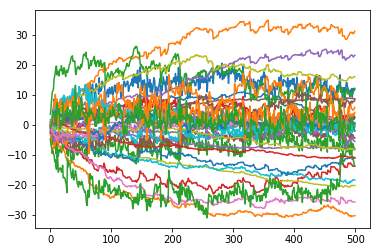

In [61]:
all_weights_array = np.stack(all_weights)
plt.plot(all_weights_array);

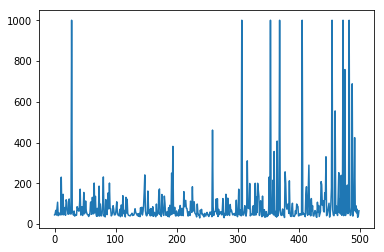

In [62]:
plt.plot(all_num)

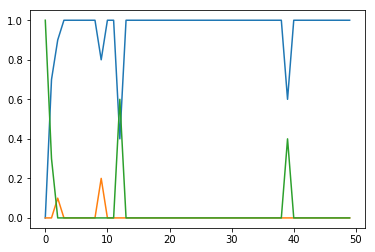

In [63]:
loss_rand = 1-np.array(test_results_rand)-np.array(test_draws_rand)
plt.plot(test_results_rand),plt.plot(test_draws_rand),plt.plot(loss_rand);

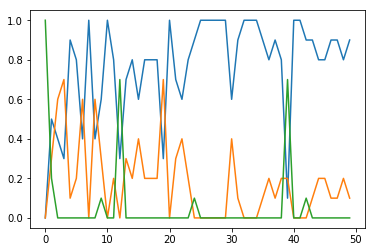

In [64]:
loss_1 = 1-np.array(test_results_1)-np.array(test_draws_1)
plt.plot(test_results_1),plt.plot(test_draws_1),plt.plot(loss_1);

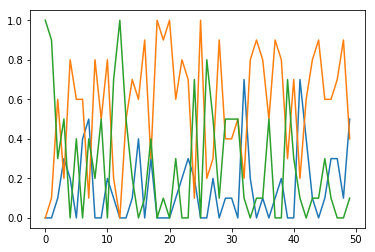

In [65]:
loss_2 = 1-np.array(test_results_2)-np.array(test_draws_2)
plt.plot(test_results_2),plt.plot(test_draws_2),plt.plot(loss_2);

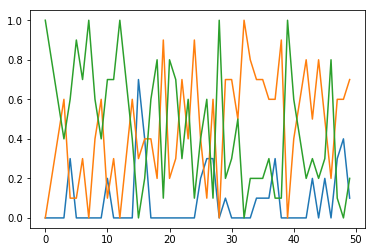

In [66]:
loss_3 = 1-np.array(test_results_3)-np.array(test_draws_3)
plt.plot(test_results_3),plt.plot(test_draws_3),plt.plot(loss_3);

In [67]:
first_agent = QLearningAgent(alpha=0., gamma=0.7, epsilon=0., is_learning_agent=False, weights=all_weights[-1])

test_results = []
test_draws = []

n_games_test = 100
max_random_start_depth = 3

for n in range(n_games_test):
    if n%10 ==0:print(n)
    first_agent_turn = bool(np.random.binomial(1,0.5))
    rules = ClassicGameRules(max_moves=max_moves)
    game = rules.new_game(first_agent, ab1, first_agent_turn, quiet=quiet)
    
    # random start
    for _ in range(np.random.choice(max_random_start_depth)*2):
        possible_moves = game.game_state.board.get_possible_next_moves()
        next_move = possible_moves[np.random.choice(len(possible_moves),size=1)[0]]
        game.game_state.board.make_move(next_move, switch_player_turn=True)

    num_moves, game_state = game.run()
    test_results.append(game_state.is_first_agent_win())
    test_draws.append(game_state.max_moves_done)
np.mean(np.array(test_results)),np.mean(np.array(test_draws))

0
10
20
30
40
50
60
70
80
90


(0.81, 0.19)

In [68]:
first_agent = QLearningAgent(feature_func, n_features, alpha=0., gamma=0.7, epsilon=0., is_learning_agent=False, weights=all_weights[-1])

test_results = []
test_draws = []

n_games_test = 100
max_random_start_depth = 3

for n in range(n_games_test):
    if n%10 ==0:print(n)
    first_agent_turn = bool(np.random.binomial(1,0.5))
    rules = ClassicGameRules(max_moves=max_moves)
    game = rules.new_game(first_agent, ab2, first_agent_turn, quiet=quiet)
    
    # random start
    for _ in range(np.random.choice(max_random_start_depth)*2):
        possible_moves = game.game_state.board.get_possible_next_moves()
        next_move = possible_moves[np.random.choice(len(possible_moves),size=1)[0]]
        game.game_state.board.make_move(next_move, switch_player_turn=True)

    num_moves, game_state = game.run()
    test_results.append(game_state.is_first_agent_win())
    test_draws.append(game_state.max_moves_done)
np.mean(np.array(test_results)),np.mean(np.array(test_draws))

0
10
20
30
40
50
60
70
80
90


(0.26, 0.61)

In [69]:
first_agent = QLearningAgent(feature_func, n_features, alpha=0., gamma=0.7, epsilon=0., is_learning_agent=False, weights=all_weights[-1])

test_results = []
test_draws = []

n_games_test = 100
max_random_start_depth = 3

for n in range(n_games_test):
    if n%10 ==0:print(n)
    first_agent_turn = bool(np.random.binomial(1,0.5))
    rules = ClassicGameRules(max_moves=max_moves)
    game = rules.new_game(first_agent, ab3, first_agent_turn, quiet=quiet)
    
    # random start
    for _ in range(np.random.choice(max_random_start_depth)*2):
        possible_moves = game.game_state.board.get_possible_next_moves()
        next_move = possible_moves[np.random.choice(len(possible_moves),size=1)[0]]
        game.game_state.board.make_move(next_move, switch_player_turn=True)

    num_moves, game_state = game.run()
    test_results.append(game_state.is_first_agent_win())
    test_draws.append(game_state.max_moves_done)
np.mean(np.array(test_results)),np.mean(np.array(test_draws))

0
10
20
30
40
50
60
70
80
90


(0.03, 0.53)

In [70]:
first_agent = QLearningAgent(feature_func, n_features, alpha=0., gamma=0.7, epsilon=0., is_learning_agent=False, weights=all_weights[np.argmax(test_results_2)*test_frequency])

test_results = []
test_draws = []
max_random_start_depth = 3

n_games_test = 100
for n in range(n_games_test):
    if n%10 ==0:print(n)
    first_agent_turn = bool(np.random.binomial(1,0.5))
    rules = ClassicGameRules(max_moves=max_moves)
    game = rules.new_game(first_agent, ab2, first_agent_turn, quiet=quiet)
    
    for _ in range(np.random.choice(max_random_start_depth)*2):
        possible_moves = game.game_state.board.get_possible_next_moves()
        next_move = possible_moves[np.random.choice(len(possible_moves),size=1)[0]]
        game.game_state.board.make_move(next_move, switch_player_turn=True)

    num_moves, game_state = game.run()
    test_results.append(game_state.is_first_agent_win())
    test_draws.append(game_state.max_moves_done)
np.mean(np.array(test_results)),np.mean(np.array(test_draws))

0
10
20
30
40
50
60
70
80
90


(0.2, 0.64)

In [71]:
first_agent = QLearningAgent(feature_func, n_features, alpha=0., gamma=0.7, epsilon=0., is_learning_agent=False, weights=all_weights[np.argmax(test_results_3)*test_frequency])

test_results = []
test_draws = []
max_random_start_depth = 3

n_games_test = 100
for n in range(n_games_test):
    if n%10 ==0:print(n)
    first_agent_turn = bool(np.random.binomial(1,0.5))
    rules = ClassicGameRules(max_moves=max_moves)
    game = rules.new_game(first_agent, ab3, first_agent_turn, quiet=quiet)
    
    for _ in range(np.random.choice(max_random_start_depth)*2):
        possible_moves = game.game_state.board.get_possible_next_moves()
        next_move = possible_moves[np.random.choice(len(possible_moves),size=1)[0]]
        game.game_state.board.make_move(next_move, switch_player_turn=True)

    num_moves, game_state = game.run()
    test_results.append(game_state.is_first_agent_win())
    test_draws.append(game_state.max_moves_done)
np.mean(np.array(test_results)),np.mean(np.array(test_draws))

0
10
20
30
40
50
60
70
80
90


(0.25, 0.51)